In [ ]:
using Pkg
Pkg.activate(joinpath(dirname(pwd()), "conf", "07_Ex4"))
Pkg.instantiate();

In [3]:
using RDatasets, LinearAlgebra

In [4]:
using Plots, Optim, StatsBase

In [5]:
data_pressure = dataset("datasets", "pressure")

Row,Temperature,Pressure
,Int64,Float64
1,0,0.0002
2,20,0.0012
3,40,0.006
4,60,0.03
5,80,0.09
6,100,0.27
7,120,0.75
8,140,1.85
9,160,4.2


In [6]:
names(data_pressure)

2-element Vector{String}:
 "Temperature"
 "Pressure"

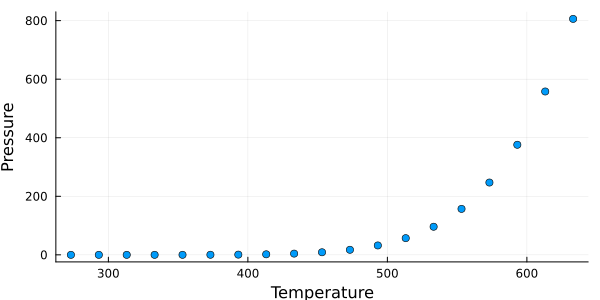

In [7]:
scatter(273.15.+data_pressure[:,1], data_pressure[:,2], 
            legend=false,
            xlabel = "Temperature",
            ylabel = "Pressure",
            size = (600,300))

In [8]:
k = size(data_pressure, 1)
n = round(Int, k * 0.75);

In [9]:
i_training = sample(1:k, n, replace = false)
X = -1 ./(273.15 .+ data_pressure[i_training,1])
Y = log10.(data_pressure[i_training,2])

14-element Vector{Float64}:
 -2.9208187539523753
  2.1958996524092336
  1.2380461031287955
  2.575187844927661
  0.6232492903979004
  1.9822712330395684
 -1.0457574905606752
  2.906335041805091
 -0.12493873660829995
  0.9444826721501687
 -0.5686362358410126
 -2.221848749616356
  1.7558748556724915
 -1.5228787452803376

In [10]:
i_test = setdiff(1:k, i_training)
X_test = -1 ./ (273.15 .+ data_pressure[i_test,1]);
Y_test = log10.(data_pressure[i_test,2]);

In [11]:
Ω = [ones(n) X]

14×2 Matrix{Float64}:
 1.0  -0.00341122
 1.0  -0.00180783
 1.0  -0.00211349
 1.0  -0.00168591
 1.0  -0.00230867
 1.0  -0.00187564
 1.0  -0.00283166
 1.0  -0.0015794
 1.0  -0.00254356
 1.0  -0.00220677
 1.0  -0.00267989
 1.0  -0.00319336
 1.0  -0.00194875
 1.0  -0.00300165

In [12]:
θ_ERM = pinv(Ω)*Y

2-element Vector{Float64}:
    7.932794817867245
 3171.1236437687694

In [13]:
println("a = $(θ_ERM[1]), b = $(θ_ERM[2])") #log10(P) = a - b/x

a = 7.932794817867245, b = 3171.1236437687694


In [14]:
Y[:]

14-element Vector{Float64}:
 -2.9208187539523753
  2.1958996524092336
  1.2380461031287955
  2.575187844927661
  0.6232492903979004
  1.9822712330395684
 -1.0457574905606752
  2.906335041805091
 -0.12493873660829995
  0.9444826721501687
 -0.5686362358410126
 -2.221848749616356
  1.7558748556724915
 -1.5228787452803376

In [15]:
θ_ERM[1] .+ θ_ERM[2].*X[:]

14-element Vector{Float64}:
 -2.8846148487497416
  2.1999490368516623
  1.2306419196980194
  2.586552478208189
  0.6117198005088946
  1.9848933946865843
 -1.0467426131642412
  2.9243076603709657
 -0.13314348499112683
  0.9348390774528799
 -0.5654596207466351
 -2.193737654649981
  1.7530741830260306
 -1.5858113468296473

In [16]:
f(u) = θ_ERM[1] + u * θ_ERM[2]

f (generic function with 1 method)

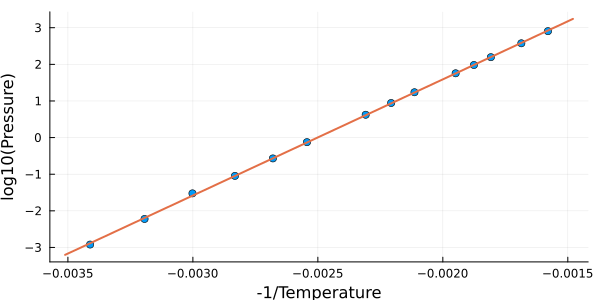

In [17]:
scatter(X,Y, legend=false, 
            xlabel = "-1/Temperature",
            ylabel = "log10(Pressure)",
            size = (600,300))
plot!(f, minimum(X)-0.0001, maximum(X)+0.0001, lw = 2)

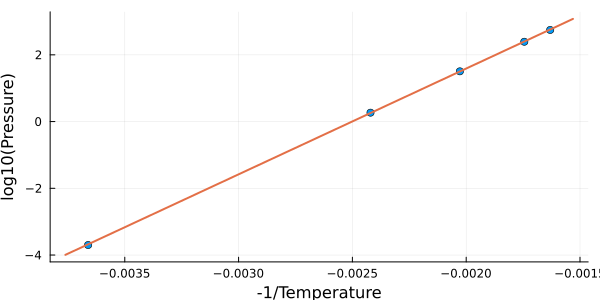

In [18]:
scatter(X_test,Y_test, legend=false, 
            xlabel = "-1/Temperature",
            ylabel = "log10(Pressure)",
            size = (600,300))
plot!(f, minimum(X_test)-0.0001, maximum(X_test)+0.0001, lw = 2)